# Multiple Linear Regression

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [261]:
dataset = pd.read_csv('SaratogaHouses.csv')

In [262]:
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [263]:
x = dataset[['livingArea', 'landValue',
             'rooms', 'centralAir']].values
y = dataset['price'].values

In [264]:
x

array([[906, 50000, 5, 'No'],
       [1953, 22300, 6, 'No'],
       [1944, 7300, 8, 'No'],
       ...,
       [1099, 20400, 3, 'No'],
       [1225, 16800, 7, 'No'],
       [1959, 26000, 6, 'No']], dtype=object)

In [265]:
#centralAir has text values. We need to encode it in numerical form
x[:,-1]

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
encoder = LabelEncoder()

In [268]:
#x[:,-1] means last column of all rows , i.e ,centralAir column
x[:,-1] = encoder.fit_transform(x[:,-1])

In [269]:
#encoding has been done, first four values were 'no' - they have been converted to 0 and 5th value was 'yes' which
#has been converted to 1
x[:,-1][:5]

array([0, 0, 0, 0, 1], dtype=object)

In [270]:
#now we need to scale our data so that all the values are in same range and are very small in value
#currently our data is not in same range
#price is in lakhs whereas rooms range from 1-12
from sklearn.preprocessing import StandardScaler

In [271]:
std = StandardScaler()

In [272]:
x = std.fit_transform(x)

In [273]:
y = y.reshape(-1,1)
y = std.fit_transform(y)

In [274]:
#all the 4 columns - livingArea, landValue, rooms, centralAir are in same range now and very small in value
x[:2]

array([[-1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.31951971, -0.350095  , -0.44981202, -0.76221375]])

In [275]:
#price also has been scaled
y[:2]

array([[-0.80748259],
       [-0.31349249]])

In [276]:
#y = b0 + b1x1 + b2x2 + b3x3 + b4x4
#this is the equation that we are using
#let x0 = 1 or [1,1,1,1,1,1,....,1,1,1,1], size of x0 depends on the no. of rows of our data
#y = b0x0 + b1x1 + b2x2 + b3x3 + b4x4
#here we can see the shape of our data
#it has some 1700 rows, we are going to use the value at 0th index of this tuple - 1728 to create our array of x0
x.shape

(1728, 4)

In [277]:
#creating x0 by using the no. of rows of x
x0 = np.ones(x.shape[0])

In [278]:
len(x0)

1728

In [279]:
#since we cant prepend x0 into our x which is a 2D array
#we need to bulid a new 2D array
#first we place x0 array that we created in the above step
#then we bring the first column from x (x1) and place it after x0
#then we bring the first column from x (x2) and place it after x1 and so on
#x[:,0] means livingArea column from our data
#x[:,1] means landValue column from our data
newX = np.array([x0, x[:,0], x[:,1], x[:,2], x[:,3]])

In [280]:
# But now if you will look at our new data it's looking very weird
#We need to transpose it so that each row contains our features and not all the values of one feature
#for more clarity check how x was looking at the starting
newX

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-1.36985441,  0.31951971,  0.30499787, ..., -1.05844161,
        -0.85513584,  0.32920094],
       [ 0.44108417, -0.350095  , -0.77853137, ..., -0.4043636 ,
        -0.50718833, -0.24441402],
       [-0.88163155, -0.44981202,  0.41382706, ..., -1.74527063,
        -0.01799248, -0.44981202],
       [-0.76221375, -0.76221375, -0.76221375, ..., -0.76221375,
        -0.76221375, -0.76221375]])

In [281]:
#transpose x and store its state back in same variable
newX = newX.T

In [282]:
#now our data is looking fit for regression analysis - scaling done, encoding done
newX[:5]

array([[ 1.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 1.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 1.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 1.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 1.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793]])

In [283]:
newX.shape

(1728, 5)

In [284]:
#only thing that remains is that we dont know the slopes or better known as weights
#so we create an array with weights equal to zero
#the size of this weights array should be one more than the no of features we have because we have an extra column- x0
#the size of this array can be directly extracted from the shape of the newly created x - newX, see the above line
B = np.zeros(newX.shape[1])

In [285]:
B

array([0., 0., 0., 0., 0.])

# Gradient Descent of One Half Mean Squared Error

In [286]:
#go and check out gradient descent function first
def cost_function(x,y,B):
    return np.sum((newX.dot(B) - y) ** 2) / (2*n)
#cost(J)/one half mean squared error = (1/2n) * summation_of((y_cap - y)**2)
#where y_cap = B.X

In [287]:
#in gradient_descent, we calculate weights and change them for epoch no of times (weights means B0,B1,B2,B3,B4)
#Formula for doing so is -> B = B - alpha * ( (1/n) * ( y_cap - y) . X )
# where alpha is learning rate or step for changing the slope on each iteration
#we start by creating a function which will accept our data (x and y), weights (B), epochs (how many times loop
#should run) and learning rate
def gradient_descent(x,y,B,epochs,learning_rate):
    cost_history = []
    #we create a loop in range of epochs
    for epoch in range(epochs):
        #our first step is to calculate y_cap or y_prediction
        #that thing we have already studied that y = b0x0 + b1x1 + b2x2 + b3x3 + b4x4 can be reduced to
        #y = B.X -> so we are going to use this eqn
        #we cannot perform B.X, we have to perform X.B because X has shape (1728,5) and B has (5,)
        #the resultant y_pred will have a shape (1728,)
        #on first iteration B is [0,0,0,0,0] so all the values in y_pred will also be zero
        #but from next iteration things will change because B will not be [0,0,0,0,0] anymore
        y_pred = x.dot(B)
        #now we have to calculate loss, i.e., diff b/w prediction and actual value
        #since y_pred is 1D and has shape (1728,)
        #we need y to be also 1D which is not the case
        #while performing feature scaling (standardization), we converted y into 2D and has shape (1728,1)
        #so while calling gradient_descent(), we will use flatten() which converts 2D array having only column
        #back into a 1D array
        loss = y_pred - y
        #next step is to calculate gradient which is going to alter our weights for each epoch
        #we have calculated (y_cap - y) already
        #we just need to dot product it with X and divide it by n
        #again the shapes are different so it's difficult to perform dot product
        # x has shape (1728,5) whereas loss has shape (1728,)
        # so we need to transpose x so that dot product can be done b/w x (5,1728) and loss (1728,)
        # resultant value will be of shape (5,) and we will divide it by n
        #gradient also has a final shape (5,)
        gradient = x.T.dot(loss) / n
        #now we need to use learning rate and gradient to modify our weights
        #B has shape(5,) and gradient has shape(5,) , so we have no problems in performing this step
        B = B - learning_rate * gradient
        #now we need to calculate cost according to the new weights so we are going to pass our data and weights to 
        #cost_function() and we are going to get back the cost via return statement
        cost = cost_function(x,y,B)
        #we will store all the values of cost in a list so that we can plot a graph later on
        cost_history.append(cost)
    #return list of cost_history for plotting purposes and B for finding the new errors based on the latest weights
    #that is going to give us more accuracy hopefully ;)
    return cost_history, B

In [288]:
cost_history, B = gradient_descent(newX, y.flatten(), B ,epochs=5000, learning_rate=0.001)

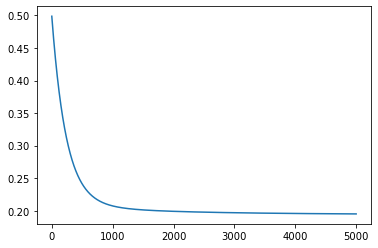

In [289]:
a = plot.plot(cost_history)

In [290]:
#calculate predictions,mse and rmse again with the latest weights to get somewhat less errors
y_pred = newX.dot(B)

In [291]:
from sklearn.metrics import mean_squared_error

In [292]:
mse = mean_squared_error(y_pred,y)

In [293]:
rmse = np.sqrt(mse)

In [294]:
mse,rmse

(0.3901616680301511, 0.6246292244445109)